In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
fraud=pd.read_csv("Fraud_check.csv")
fraud 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
fraud.shape

(600, 6)

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

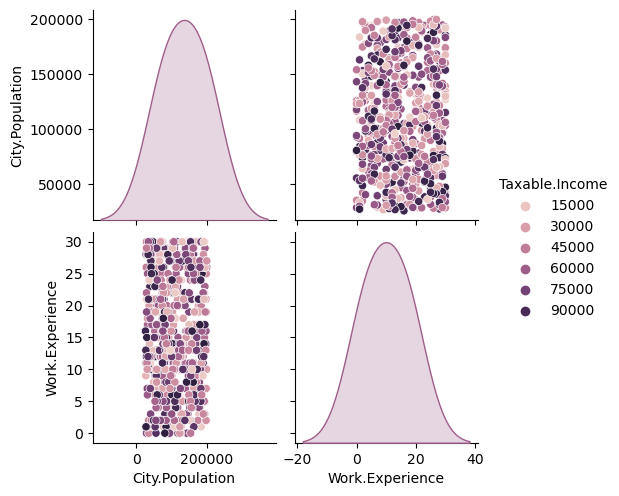

In [8]:
sns.pairplot(data=fraud, hue = 'Taxable.Income')

In [9]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [10]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population",
                      "Work.Experience":"experience","Urban":"urban"},inplace=True)

In [11]:
# Preprocessing the model
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [12]:
x = fraud.iloc[:,0:5]
y = fraud.iloc[:,5]

In [136]:
colnames = list(fraud.columns)
colnames

['undergrad', 'marital', 'population', 'experience', 'urban', 'income']

In [137]:
predictors = colnames[0:5]
predictors

['undergrad', 'marital', 'population', 'experience', 'urban']

In [138]:
target = colnames[5]
target

'income'

In [139]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [140]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [141]:
# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [142]:
rfc.estimators_

[DecisionTreeClassifier(max_features=3, random_state=1608637542),
 DecisionTreeClassifier(max_features=3, random_state=1273642419),
 DecisionTreeClassifier(max_features=3, random_state=1935803228),
 DecisionTreeClassifier(max_features=3, random_state=787846414),
 DecisionTreeClassifier(max_features=3, random_state=996406378),
 DecisionTreeClassifier(max_features=3, random_state=1201263687),
 DecisionTreeClassifier(max_features=3, random_state=423734972),
 DecisionTreeClassifier(max_features=3, random_state=415968276),
 DecisionTreeClassifier(max_features=3, random_state=670094950),
 DecisionTreeClassifier(max_features=3, random_state=1914837113),
 DecisionTreeClassifier(max_features=3, random_state=669991378),
 DecisionTreeClassifier(max_features=3, random_state=429389014),
 DecisionTreeClassifier(max_features=3, random_state=249467210),
 DecisionTreeClassifier(max_features=3, random_state=1972458954),
 DecisionTreeClassifier(max_features=3, random_state=1572714583),
 DecisionTreeClass

In [143]:
rfc.classes_

array([0, 1])

In [144]:
rfc.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5

In [145]:
rfc.n_classes_

2

In [146]:
rfc.n_outputs_

1

In [147]:
# Predictions on train data
pred_train = rfc.predict(x_train)
pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [148]:
# Accuracy score on train data 
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,pred_train)
acc_train

1.0

In [149]:
np.mean(prediction == y_train)

1.0

In [150]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,pred_train)
confusion

array([[382,   0],
       [  0,  98]], dtype=int64)

In [151]:
# Prediction on test data
pred_test = rfc.predict(x_test)
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
# Accuracy on test data
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.75

In [153]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(rfc, x, y, cv=kfold)
results

array([0.73333333, 0.78333333, 0.75      , 0.66666667, 0.71666667,
       0.73333333, 0.81666667, 0.71666667, 0.71666667, 0.8       ])

In [118]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [119]:
tree = rfc.estimators_[5]
tree

DecisionTreeClassifier(max_features=3, random_state=1201263687)

In [120]:
dot_data = StringIO()
dot_data

In [121]:
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True,
                feature_names = predictors ,class_names = target,impurity =False)

In [122]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph